In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bcd = datasets.load_breast_cancer()
x = bcd.data
y = bcd.target

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)

In [10]:
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Logistic regression and ROC curve

In [16]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=3000)
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  4],
       [ 1, 70]], dtype=int64)

In [18]:
from sklearn.preprocessing import normalize

cm = normalize(cm,norm='l1',axis=1)

cm_df = pd.DataFrame(cm, columns=bcd.target_names, index=bcd.target_names)
print(cm_df)

           malignant    benign
malignant   0.906977  0.093023
benign      0.014085  0.985915


# ROC curve

Receiver operating characteristic

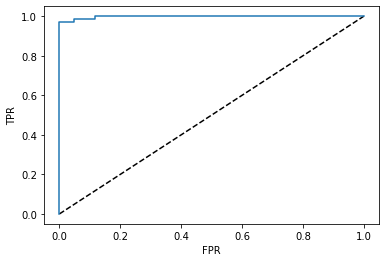

In [21]:
from sklearn.metrics import roc_curve
y_pred_prob = log.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# AUC

area under the roc curve

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9977071732721913

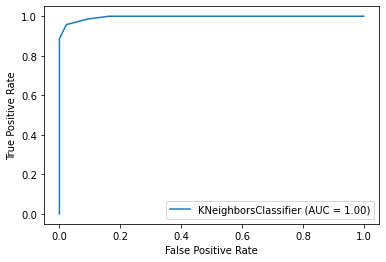

In [36]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(knn, x_test, y_test) 

plt.show()